<a href="https://colab.research.google.com/github/DaDosValle/telecomX_Churn/blob/main/ETL_EDA_TELECOMX_27_12_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Empresa Telecom X: etapa ETL/EDA da análise de dados.**

## Quais são os dois fatores com maior impacto na evasão de clientes, considerando variáveis categóricas e numéricas do dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracão


#### Extração de dados de API fornecida pelo programa ONE

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#### Normlização de dados aninhados em arquivo json.

In [3]:
cols = ['customer', 'phone', 'internet', 'account']

for col in cols:
    norm = pd.json_normalize(df[col])
    norm.columns = [f'{col}_{c}' for c in norm.columns]
    df = df.drop(columns=col).join(norm)

#🔧 Limpeza e transformação

Verificação e estudo do dataset.

In [4]:
df_churn = df.copy()
df_churn.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [6]:
df_churn.isna().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0



Não foram encontrados dados duplicados ou nulos, porém dados em brancos, como no caso da coluna Churn, e inconsistentes a exemplos das demais colunas.

In [7]:
df_churn['customerID'].duplicated().unique()

array([False])

In [8]:
df_churn['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [9]:
df_churn.head(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


Traduzindo os nomes das colunas.

In [10]:
df_churn = df_churn.rename(columns={
    'customerID': 'id cliente',
    'Churn': 'churn',
    'customer_gender': 'sexo',
    'customer_SeniorCitizen': 'idoso',
    'customer_Partner': 'possui parceiro',
    'customer_Dependents': 'possui dependentes',
    'customer_tenure': 'tempo contrato',

    'phone_PhoneService': 'servico telefone',
    'phone_MultipleLines': 'multiplas linhas',

    'internet_InternetService': 'servico internet',
    'internet_OnlineBackup': 'backup online',
    'internet_DeviceProtection': 'protecao dispositivo',
    'internet_TechSupport': 'suporte tecnico',
    'internet_StreamingTV': 'streaming tv',
    'internet_StreamingMovies': 'streaming filmes',

    'account_Contract': 'contrato conta',
    'account_PaperlessBilling': 'fatura digital',
    'account_PaymentMethod': 'metodo pagamento',
    'account_Charges.Monthly': 'cobrancas mensais',
    'account_Charges.Total': 'total de encargos',
    'internet_OnlineSecurity': 'seguranca online'
})

Criando um novo dataframe com a exclusão das colunas desncessárias para esta análise.

In [11]:
df_churn_ajustado = df_churn.drop(
    columns=[
        'id cliente',
        'protecao dispositivo',
        'fatura digital',
        'backup online',
        'metodo pagamento',
        'seguranca online'
        ],
    errors='ignore'
)

In [12]:
df_churn_ajustado.head(3)

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,cobrancas mensais,total de encargos
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,Yes,Yes,No,One year,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,Yes,Month-to-month,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,Month-to-month,73.9,280.85


Transformação dos dados.

Transformando dados object (Yes, No) em int64 (1, 0). Corrigindo dados inconsistentes object (No phone service, No internet service) em int64 (0), assim como tranformando dados em branco em int64(5), pois assim facilita a exclusão ou agrupamento.

In [13]:
colunas_para_converter_str_para_int = ['churn',
    'possui parceiro', 'possui dependentes', 'servico telefone',
    'multiplas linhas', 'suporte tecnico', 'streaming tv', 'streaming filmes'
]


df_churn_ajustado['churn'] = df_churn_ajustado['churn'].fillna('ausente')


df_churn_ajustado[colunas_para_converter_str_para_int] = (
    df_churn_ajustado[colunas_para_converter_str_para_int].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, 'ausente': 5, '': 5})
)


df_churn_ajustado[colunas_para_converter_str_para_int] = (
    df_churn_ajustado[colunas_para_converter_str_para_int].astype(np.int64)
)

/tmp/ipython-input-975411954.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn_ajustado[colunas_para_converter_str_para_int].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, 'ausente': 5, '': 5})


Tradução dos registros categóricos.

In [14]:
df_churn_ajustado['sexo'] = df_churn_ajustado['sexo'].replace({
    'Male': 'Masculino',
    'Female': 'Feminino'
})

df_churn_ajustado['servico internet'] = df_churn_ajustado['servico internet'].replace({
    'Fiber optic': 'Fibra optica',
    'No': 'Nao disponivel'
})

df_churn_ajustado['contrato conta'] = df_churn_ajustado['contrato conta'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Um ano',
    'Two year': 'Dois anos'
})


In [15]:
df_churn_ajustado.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,cobrancas mensais,total de encargos
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,65.6,593.3
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,59.9,542.4
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,73.9,280.85
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,98.0,1237.85
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,83.9,267.4


Após a tradução, correção e ajuste dos dados foi atribuido o dataframe atual a um novo dataframe e criado um arquivo csv.

In [16]:
dados_churn_traduzido = df_churn_ajustado.copy()

In [17]:
dados_churn_traduzido.to_csv('dados_churn_traduzido.csv', index=False)

In [18]:
df_churn_traduzido = pd.read_csv('/content/dados_churn_traduzido.csv')

In [19]:
dados_churn_traduzido['churn'].unique()

array([0, 1, 5])

In [20]:
dados_churn_traduzido['total de encargos'] = (
    pd.to_numeric(dados_churn_traduzido['total de encargos'], errors='coerce')
)

In [21]:
dados_churn_traduzido['total de encargos'] = dados_churn_traduzido['total de encargos'].astype(np.float64)

In [22]:
dados_churn_traduzido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   churn               7267 non-null   int64  
 1   sexo                7267 non-null   object 
 2   idoso               7267 non-null   int64  
 3   possui parceiro     7267 non-null   int64  
 4   possui dependentes  7267 non-null   int64  
 5   tempo contrato      7267 non-null   int64  
 6   servico telefone    7267 non-null   int64  
 7   multiplas linhas    7267 non-null   int64  
 8   servico internet    7267 non-null   object 
 9   suporte tecnico     7267 non-null   int64  
 10  streaming tv        7267 non-null   int64  
 11  streaming filmes    7267 non-null   int64  
 12  contrato conta      7267 non-null   object 
 13  cobrancas mensais   7267 non-null   float64
 14  total de encargos   7256 non-null   float64
dtypes: float64(2), int64(10), object(3)
memory usage: 851.7

In [23]:
dados_churn_traduzido['excedente a mensalidade'] = dados_churn_traduzido[
    'total de encargos'] - dados_churn_traduzido['cobrancas mensais']

Excluido dados que originalmente eram em branco e criando novas colunas numéricas para melhores insights.

In [24]:
cobrancas_diarias = dados_churn_traduzido['cobrancas mensais'] / 30
dados_churn_traduzido.insert(13, 'preco diario', cobrancas_diarias)

In [25]:
dados_churn_traduzido['churn'].unique()

array([0, 1, 5])

In [26]:
indices_churn_ausentes = dados_churn_traduzido[
    dados_churn_traduzido['churn'] == 5
].index


In [27]:
dados_churn_traduzido = dados_churn_traduzido.drop(indices_churn_ausentes)

In [28]:
dados_churn_traduzido.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.186667,65.6,593.30,527.70
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,1.996667,59.9,542.40,482.50
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.463333,73.9,280.85,206.95
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.266667,98.0,1237.85,1139.85
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.796667,83.9,267.40,183.50


In [29]:
dados_churn_traduzido.replace(r'^\s*$', np.nan, regex=True, inplace=True)


In [30]:
dados_churn_traduzido.isna().sum()


,0
churn,0
sexo,0
idoso,0
possui parceiro,0
possui dependentes,0
tempo contrato,0
servico telefone,0
multiplas linhas,0
servico internet,0
suporte tecnico,0


In [31]:
dados_churn_traduzido['total de encargos'] = dados_churn_traduzido['total de encargos'].interpolate(method='linear')

In [32]:
dados_churn_traduzido.isna().sum()

,0
churn,0
sexo,0
idoso,0
possui parceiro,0
possui dependentes,0
tempo contrato,0
servico telefone,0
multiplas linhas,0
servico internet,0
suporte tecnico,0


In [33]:
dados_churn_traduzido = dados_churn_traduzido.drop(columns=['excedente a mensalidade'])

dados_churn_traduzido['excedente a mensalidade'] = dados_churn_traduzido['total de encargos'] - dados_churn_traduzido['cobrancas mensais']

In [34]:
dados_churn_traduzido.isna().sum()

,0
churn,0
sexo,0
idoso,0
possui parceiro,0
possui dependentes,0
tempo contrato,0
servico telefone,0
multiplas linhas,0
servico internet,0
suporte tecnico,0


In [35]:
dados_churn_traduzido['total de encargos'].max()

8684.8

In [36]:
colunas_float = ['preco diario', 'cobrancas mensais', 'total de encargos', 'excedente a mensalidade']

dados_churn_traduzido[colunas_float] = dados_churn_traduzido[colunas_float].round(1)

In [37]:
dados_churn_traduzido.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.2,65.6,593.3,527.7
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,2.0,59.9,542.4,482.5
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.5,73.9,280.8,207.0
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.3,98.0,1237.8,1139.8
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.8,83.9,267.4,183.5


In [38]:
indices_churn_ausentes = dados_churn_traduzido[
    dados_churn_traduzido['churn'] == 5
].index

dados_churn_traduzido = dados_churn_traduzido.drop(indices_churn_ausentes)


In [39]:
print(dados_churn_traduzido['churn'].dtype)
print(dados_churn_traduzido['churn'].unique())



int64
[0 1]


In [40]:
dados_churn_traduzido = dados_churn_traduzido.reset_index(drop=True)

In [41]:
dados_churn_traduzido.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.2,65.6,593.3,527.7
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,2.0,59.9,542.4,482.5
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.5,73.9,280.8,207.0
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.3,98.0,1237.8,1139.8
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.8,83.9,267.4,183.5


#📊 Carga e análise

In [42]:
dados_churn_analise = dados_churn_traduzido

In [43]:
dados_churn_analise.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.2,65.6,593.3,527.7
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,2.0,59.9,542.4,482.5
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.5,73.9,280.8,207.0
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.3,98.0,1237.8,1139.8
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.8,83.9,267.4,183.5


Analise descritiva.

In [44]:
dados_churn_analise.describe().round(2)

,churn,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,suporte tecnico,streaming tv,streaming filmes,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.27,0.16,0.48,0.30,32.37,0.9,0.42,0.29,0.38,0.39,2.16,64.76,2284.33,2219.56
std,0.44,0.37,0.50,0.46,24.56,0.3,0.49,0.45,0.49,0.49,1.00,30.09,2265.95,2246.51
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.60,18.20,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,1.20,35.50,401.90,355.75
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,2.30,70.40,1398.60,1352.20
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,3.00,89.80,3801.50,3730.10
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,4.00,118.80,8684.80,8567.00


Gráfico explicativo da proporção de evasão e permanência de clientes.

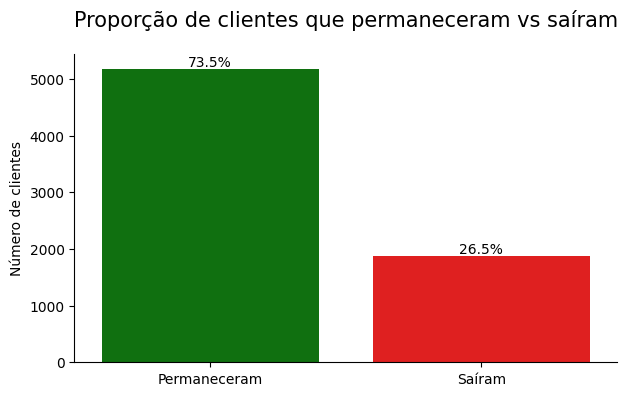

In [45]:

dados_churn_analise['churn_label'] = dados_churn_analise['churn'].map({0: 'Permaneceram', 1: 'Saíram'})

cores = {'Permaneceram':'green', 'Saíram':'red'}

plt.figure(figsize=(7,4))

ax = sns.countplot(
    x='churn_label',
    hue='churn_label',
    data=dados_churn_analise,
    palette=cores,
    order=['Permaneceram','Saíram'],
    legend=False
)



total = sum([p.get_height() for p in ax.patches])


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 50,
            f'{height/total*100:.1f}%',
            ha='center')

sns.despine()

plt.title('Proporção de clientes que permaneceram vs saíram', fontsize=15, pad=20)
plt.xlabel('')
plt.ylabel('Número de clientes')


plt.show()


Agrupamento conforme os dados categóricos.

In [46]:
churn_genero = (
    dados_churn_analise
    .groupby('sexo')['churn']
    .mean()
    .reset_index().round(2)
)

churn_genero['churn_percentual'] = churn_genero['churn'] * 100
churn_genero


,sexo,churn,churn_percentual
0,Feminino,0.27,27.0
1,Masculino,0.26,26.0


In [47]:
churn_idoso = (
    dados_churn_analise
    .groupby('idoso')['churn']
    .mean()
    .reset_index().round(2)
)

churn_idoso['churn_percentual'] = churn_idoso['churn'] * 100
churn_idoso

,idoso,churn,churn_percentual
0,0,0.24,24.0
1,1,0.42,42.0


In [48]:
churn_parceiro = (
    dados_churn_analise
    .groupby('possui parceiro')['churn']
    .mean()
    .reset_index().round(2)
)

churn_parceiro['churn_percentual'] = churn_parceiro['churn'] * 100
churn_parceiro

,possui parceiro,churn,churn_percentual
0,0,0.33,33.0
1,1,0.20,20.0


In [49]:
churn_dependentes = (
    dados_churn_analise
    .groupby('possui dependentes')['churn']
    .mean()
    .reset_index().round(2)
)

churn_dependentes['churn_percentual'] = churn_dependentes['churn'] * 100
churn_dependentes

,possui dependentes,churn,churn_percentual
0,0,0.31,31.0
1,1,0.15,15.0


In [50]:
churn_telefone = (
    dados_churn_analise
    .groupby('servico telefone')['churn']
    .mean()
    .reset_index().round(2)
)

churn_telefone['churn_percentual'] = churn_telefone['churn'] * 100
churn_telefone

,servico telefone,churn,churn_percentual
0,0,0.25,25.0
1,1,0.27,27.0


In [51]:
churn_multiplas_linhas = (
    dados_churn_analise
    .groupby('multiplas linhas')['churn']
    .mean()
    .reset_index().round(2)
)

churn_multiplas_linhas['churn_percentual'] = churn_multiplas_linhas['churn'] * 100
churn_multiplas_linhas

,multiplas linhas,churn,churn_percentual
0,0,0.25,25.0
1,1,0.29,29.0


In [52]:
churn_servico_internet = (
    dados_churn_analise
    .groupby('servico internet')['churn']
    .mean()
    .reset_index().round(2)
)

churn_servico_internet['churn_percentual'] = churn_servico_internet['churn'] * 100
churn_servico_internet

,servico internet,churn,churn_percentual
0,DSL,0.19,19.0
1,Fibra optica,0.42,42.0
2,Nao disponivel,0.07,7.0


In [53]:
churn_suporte = (
    dados_churn_analise
    .groupby('suporte tecnico')['churn']
    .mean()
    .reset_index().round(2)
)

churn_suporte['churn_percentual'] = churn_suporte['churn'] * 100
churn_suporte

,suporte tecnico,churn,churn_percentual
0,0,0.31,31.0
1,1,0.15,15.0


In [54]:
churn_streamingtv = (
    dados_churn_analise
    .groupby('streaming tv')['churn']
    .mean()
    .reset_index().round(2)
)

churn_streamingtv['churn_percentual'] = churn_streamingtv['churn'] * 100
churn_streamingtv

,streaming tv,churn,churn_percentual
0,0,0.24,24.0
1,1,0.30,30.0


In [55]:
churn_streamingfilmes = (
    dados_churn_analise
    .groupby('streaming filmes')['churn']
    .mean()
    .reset_index().round(2)
)

churn_streamingfilmes['churn_percentual'] = churn_streamingfilmes['churn'] * 100
churn_streamingfilmes

,streaming filmes,churn,churn_percentual
0,0,0.24,24.0
1,1,0.30,30.0


In [56]:
churn_contrato = (
    dados_churn_analise
    .groupby('contrato conta')['churn']
    .mean()
    .reset_index().round(2)
)

churn_contrato['churn_percentual'] = churn_contrato['churn'] * 100
churn_contrato

,contrato conta,churn,churn_percentual
0,Dois anos,0.03,3.0
1,Mensal,0.43,43.0
2,Um ano,0.11,11.0


In [57]:
churn_contrato = (
    dados_churn_analise
    .groupby('contrato conta')['churn']
    .mean()
    .reset_index().round(2)
)

churn_contrato['churn_percentual'] = churn_contrato['churn'] * 100
churn_contrato

,contrato conta,churn,churn_percentual
0,Dois anos,0.03,3.0
1,Mensal,0.43,43.0
2,Um ano,0.11,11.0


In [58]:
dados_churn_analise.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade,churn_label
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.2,65.6,593.3,527.7,Permaneceram
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,2.0,59.9,542.4,482.5,Permaneceram
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.5,73.9,280.8,207.0,Saíram
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.3,98.0,1237.8,1139.8,Saíram
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.8,83.9,267.4,183.5,Saíram


Criação e gráficos (subplots) conforme agrupamentos de variáveis categórias.

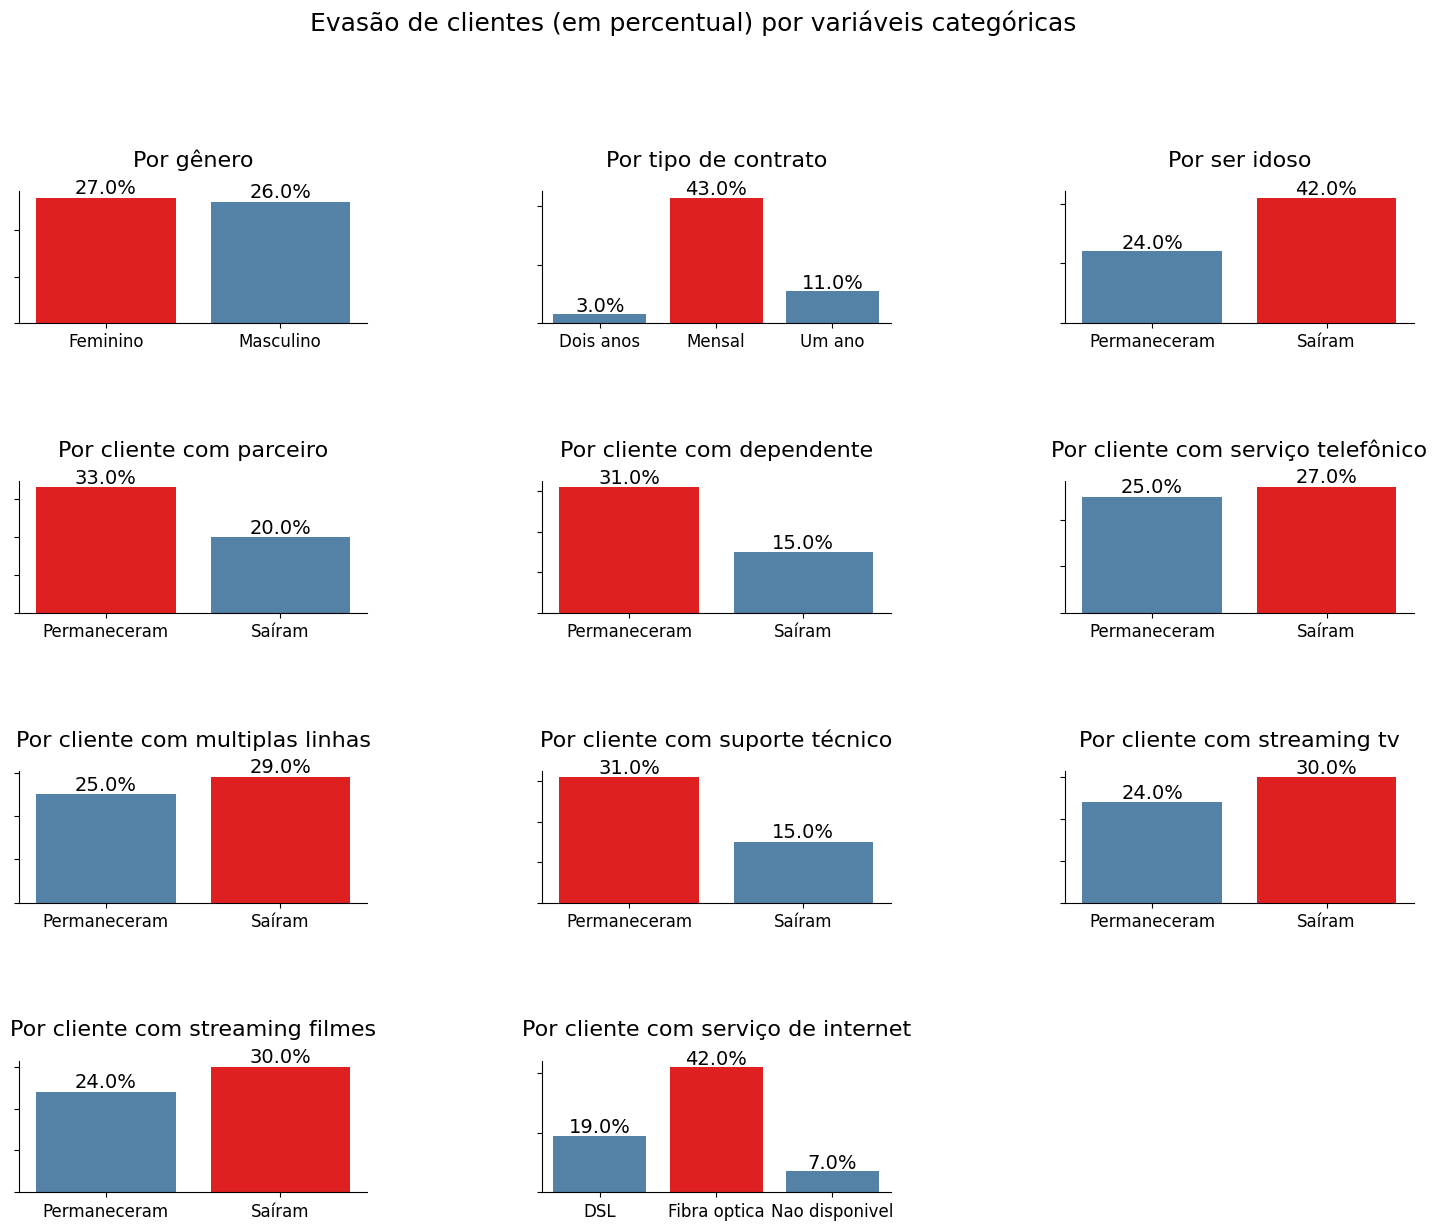

In [59]:
fig, ax = plt.subplots(4, 3, figsize=(18, 13))
fig.subplots_adjust(hspace=1.2, wspace=0.5)

dados_titulos = [
    (churn_genero, 'sexo', 'Por gênero'),
    (churn_contrato, 'contrato conta', 'Por tipo de contrato'),
    (churn_idoso, 'idoso', 'Por ser idoso'),
    (churn_parceiro, 'possui parceiro', 'Por cliente com parceiro'),
    (churn_dependentes, 'possui dependentes', 'Por cliente com dependente'),
    (churn_telefone, 'servico telefone', 'Por cliente com serviço telefônico'),
    (churn_multiplas_linhas, 'multiplas linhas', 'Por cliente com multiplas linhas'),
    (churn_suporte, 'suporte tecnico', 'Por cliente com suporte técnico'),
    (churn_streamingtv, 'streaming tv', 'Por cliente com streaming tv'),
    (churn_streamingfilmes, 'streaming filmes', 'Por cliente com streaming filmes'),
    (churn_servico_internet, 'servico internet', 'Por cliente com serviço de internet')
]

for i, (df, coluna, titulo) in enumerate(dados_titulos):
    row, col = divmod(i, 3)


    df_plot = df.copy()


    if set(df_plot[coluna].unique()) == {0, 1}:
        df_plot[coluna] = df_plot[coluna].map({0: 'Permaneceram', 1: 'Saíram'})


    max_churn = df_plot['churn_percentual'].max()
    colors = ['red' if val == max_churn else 'steelblue'
              for val in df_plot['churn_percentual']]

    sns.barplot(
        x=coluna,
        y='churn_percentual',
        data=df_plot,
        ax=ax[row, col],
        hue=coluna,
        palette=colors,
        legend=False
    )

    ax[row, col].set_title(titulo, fontsize=16, pad=18)
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel('')
    ax[row, col].tick_params(axis='x', labelsize=12)
    ax[row, col].tick_params(axis='y', labelleft=False)


    for p in ax[row, col].patches:
        height = p.get_height()
        ax[row, col].text(
            p.get_x() + p.get_width() / 2,
            height + 1.0,
            f'{height:.1f}%',
            ha='center',
            fontsize=14
        )


ax[3, 2].axis('off')

fig.suptitle(
    'Evasão de clientes (em percentual) por variáveis categóricas',
    fontsize=18,
    y=1.02
)

sns.despine()
plt.show()


Criação do conjunto de gráficos das variáveis numéricas.

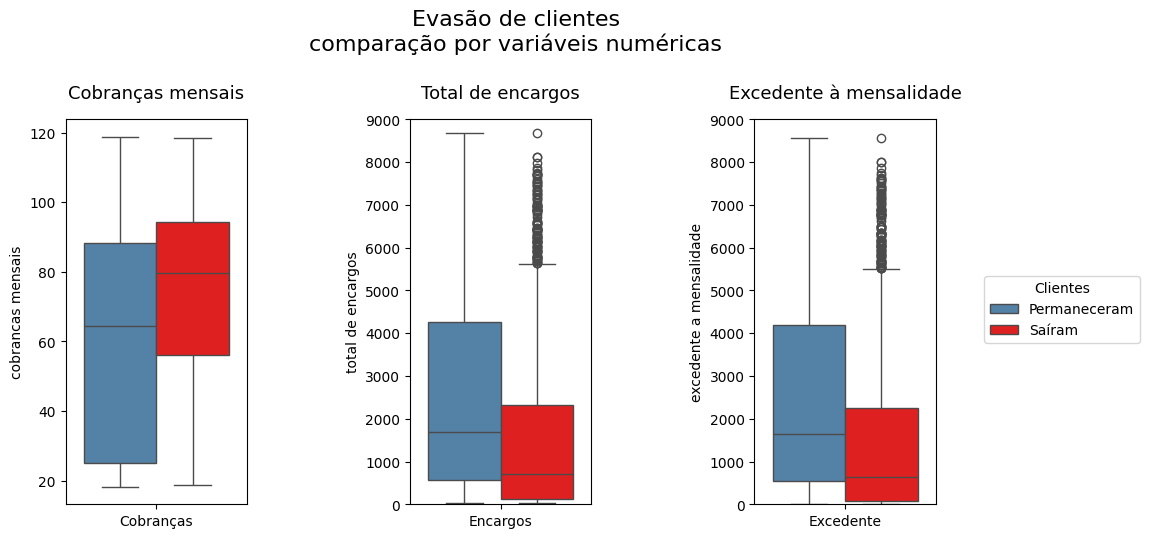

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

fig.subplots_adjust(hspace=1.2, wspace=0.9, right=0.85)

palette = {'Permaneceram': 'steelblue', 'Saíram': 'red'}


sns.boxplot(
    x=['Cobranças']*len(dados_churn_analise),
    y='cobrancas mensais',
    hue='churn_label',
    data=dados_churn_analise,
    ax=ax[0],
    palette=palette
)
ax[0].set_title('Cobranças mensais', fontsize=13, pad=15)
ax[0].set_xlabel('')
ax[0].legend_.remove()


sns.boxplot(
    x=['Encargos']*len(dados_churn_analise),
    y='total de encargos',
    hue='churn_label',
    data=dados_churn_analise,
    ax=ax[1],
    palette=palette
)
ax[1].set_title('Total de encargos', fontsize=13, pad=15)
ax[1].set_xlabel('')
ax[1].set_ylim(0, 9000)
ax[1].legend_.remove()


sns.boxplot(
    x=['Excedente']*len(dados_churn_analise),
    y='excedente a mensalidade',
    hue='churn_label',
    data=dados_churn_analise,
    ax=ax[2],
    palette=palette
)
ax[2].set_title('Excedente à mensalidade', fontsize=13, pad=15)
ax[2].set_xlabel('')
ax[2].set_ylim(0, 9000)
ax[2].legend_.remove()

# Legenda lateral direita, posicionada um pouco abaixo do topo
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(
    handles, labels, title='Clientes', fontsize=10,
    loc='center right',
    bbox_to_anchor=(1.02, 0.5),  # à direita, centro vertical
    borderaxespad=0
)

fig.suptitle(
    'Evasão de clientes\ncomparação por variáveis numéricas',
    fontsize=16,
    y=1.1
)

plt.show()


In [61]:
dados_churn_analise.head(3)

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade,churn_label
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.2,65.6,593.3,527.7,Permaneceram
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,2.0,59.9,542.4,482.5,Permaneceram
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.5,73.9,280.8,207.0,Saíram


Gráfico tempo de contrato.

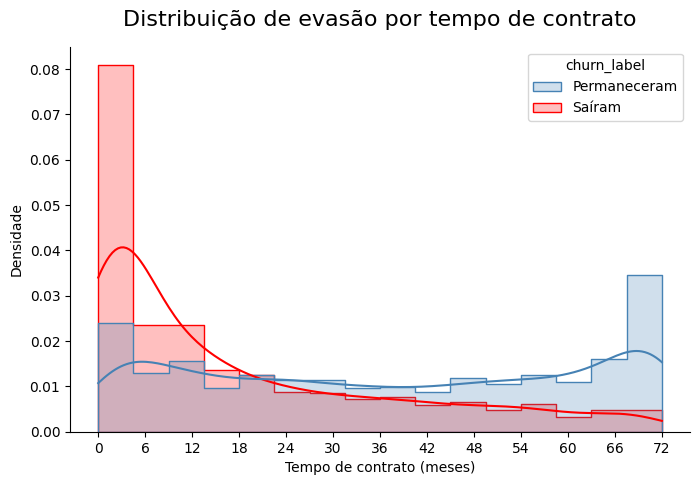

In [62]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=dados_churn_analise,
    x='tempo contrato',  # ajuste o nome conforme seu dataframe
    hue='churn_label',
    kde=True,
    palette={'Permaneceram':'steelblue', 'Saíram':'red'},
    element='step',
    stat='density',
    common_norm=False
)

max_x = dados_churn_analise['tempo contrato'].max()
ticks = np.arange(0, max_x + 6, 6)  # ticks a cada 6 meses

plt.xticks(ticks)  # ajuste os ticks no eixo x (tempo de contrato)

plt.title('Distribuição de evasão por tempo de contrato', fontsize=16, pad=15)
plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Densidade')

sns.despine()
plt.show()


# **RELATÓRIO DE ANÁLISE DE DADOS DA EVASÃO DE CLIENTES**
## **ETAPA DE ETL E EDA**

**Data:** 30/12/2025  
**Empresa:** Telecom X  
**Responsável:** Fernando do Valle

## **Introdução**

Este relatório apresenta o processo de ETL e EDA na empresa Telecom X, realizado por Fernando do Valle.  

O objetivo do projeto é a extração, limpeza, transformação, análise exploratória e carregamento do dataset com a finalidade de gerar insight capazes de influenciar a diminuição do churn da empresa.

O problema de evasão de clientes(churn) hoje representou 27% dos clientes de acordo a base de dados explorada.

## **Etapas da Implementação**

### **Pergunta SMART (hipóteses)**

**Foco da etapa:** Criar uma pergunta SMART ou uma hipótese para guiar e ser respondida pela análise de dados.

**Descrição da etapa no projeto:**  
Conforme conhecimento sobre churn e analise inicial do dataset foi criado uma pergunta SMART capaz de guiar o projeto e gerar informações valiosas para tratativa do problema de easão de cliente.

**Por que começar por aqui?**  
É importante saber quais resultados queremos obter ou aspectos queremos esclarecer, isso torna análise mais assertiva e menos sucetível a erro e somente é possível através de pergunta SMART.

### **Extração e preparação**

**Foco da etapa:** Extrair os dados e garatir que sua formatação inicial esteja devidamente adequada e permissiva para as etapas de limpeza e tratamento do conjunto de dados.

**Descrição da etapa no projeto:**  
Nessa etapa, o conjunto de dados foi extraido de [API](https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json).
O arquivo está em formato json e com alguns dados aninhados (customer, phone, internet, account) com isso foi necessário realizar uma normalização.
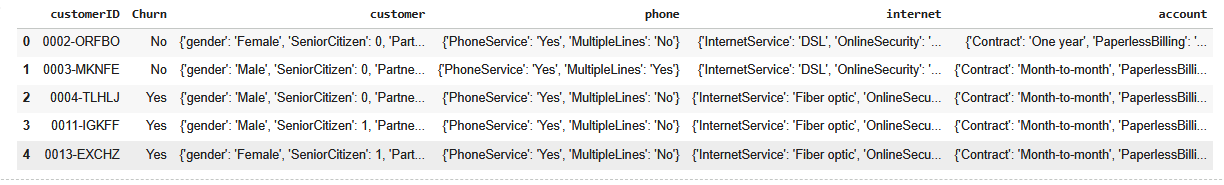

**Impacto direto:**  
Dados normalizados e em dataframe pronto para etapa seguinte de limpeza.

## **Limpreza e transformação dos dados**



**Foco da etapa:**
Embora a limpeza e transformação dos dados não necessariamente fazem parte da mesma etapa, porém nesse projeto fez sentido ao passo que executava limpeza dos dados também realizar as transofmrações. O foco dessa etapa é garantir que o conjunto de dados esteja adequado para analise exploratória através da exclusão ou adequação dos dados duplicados, em brancos, nulos ou inconsistentes, assim como transformar os dados para facilitar ou ampliar as possibilidades de insights qualificados.



**Descrição da etapa no projeto:**  
A etapa foi iniciada criando uma cópia do dataframe 'df' e nomeando de 'df_churn'. Em seguida foi realizado verificação do conjunto de dados através de métodos e atributos, por exemplo, info(), shape, head(), tail(), unique(), isna(), e duplicated() onde não foram identificados dados duplicados ou nulos, porém foram encontrados dados em branco, inconsistentes ou com formato inadequados.


Próximo passo foi a tradução dos nomes das colunas para facilitar a compreensão e agrupamento das colunas importantes para esta análise em um novo dataframe (df_churn_ajustado) através da exclusão das colunas não importantes nesse momento.


Em seguida, os registros categorizados em Yes ou No foram formatados em int64 (1, 0), pois assim facilita análises estatísticas, assim como os dados inconsistentes (
No phone service, No internet service) foram corrigidos e ajustados para formato numérico inteiro, assim como os dados em branco foram formatados como inteiro (5), pois assim facilita a exclusão ou agrupamento do dados posteriormente.


Após a tradução e ajuste dos dados necessários para análise foi atribuido o dataframe atual a um novo e em seguida salvo com formato csv. Nesse novo dataframe ainda necessário a limpeza dos dados em branco ou, agora, formatados como inteiro 5.


Nesse estágio os dados originalmente em branco foram excluídos e novas colunas númericas foram criadas (preco diario, excedente a mensalidade) a partir das colunas já existentes (cobrancas mensais, encargos totais).


Como último passo houve a padronização dos dados, sobretudo os dados númericos que foram representados com apenas uma casa decimal.

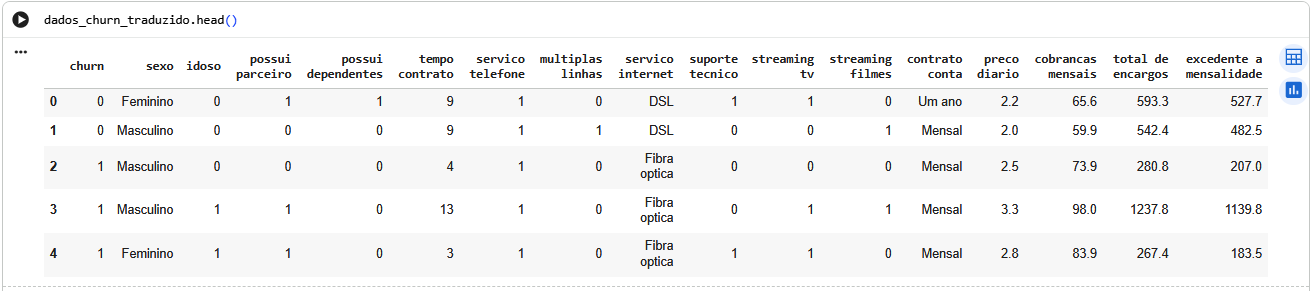


**Impacto direto:**  
A garantia que qualquer análise exploratória feita seja baseada em dados consistentes e adequados sem discrepância, viés ou erros de formatação, além de que a transformação fornece novos dados originários dos dados originais capaz que enriquecer a analise exploratória.

## **Análise exploratória**

**Foco da etapa:** Resumir, encontrar padrões ou extrair informações do conjunto de dados limpos e tratados com objetivo de gerar visualizações e/ou insights para que as partes interessadas possam guiar e orientar decisões de negócios.


**Descrição da etapa no projeto:**  
Essa etapa foi iniciada atribuindo o dataframe anterior a variável chamada dados_churn_analise, após isso foi gerado estatísticas descritivas via método describe e gráfico explicativo onde observamos evasão de 26,5% dos clientes conforme base de dados o que representa 1869 em números totais.

__
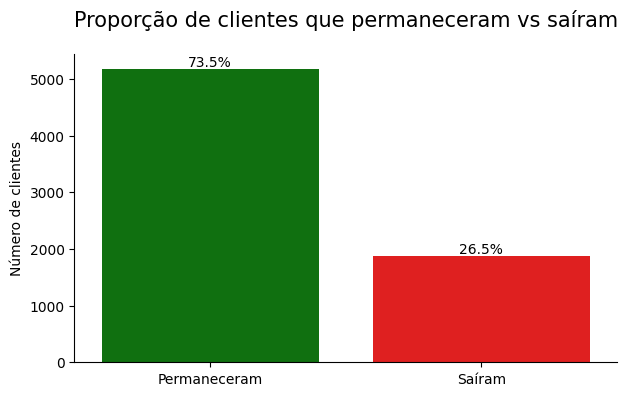

Para apoiar a análise foram criados agrupamentos de todos os dados categóricos. Segue um exemplo de um dos agrupamentos:

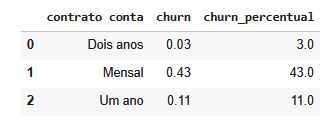

A partir dos agrupamentos dos dados categóricos foi criado um conjunto de gráficos de barras para comparação das variáveis:

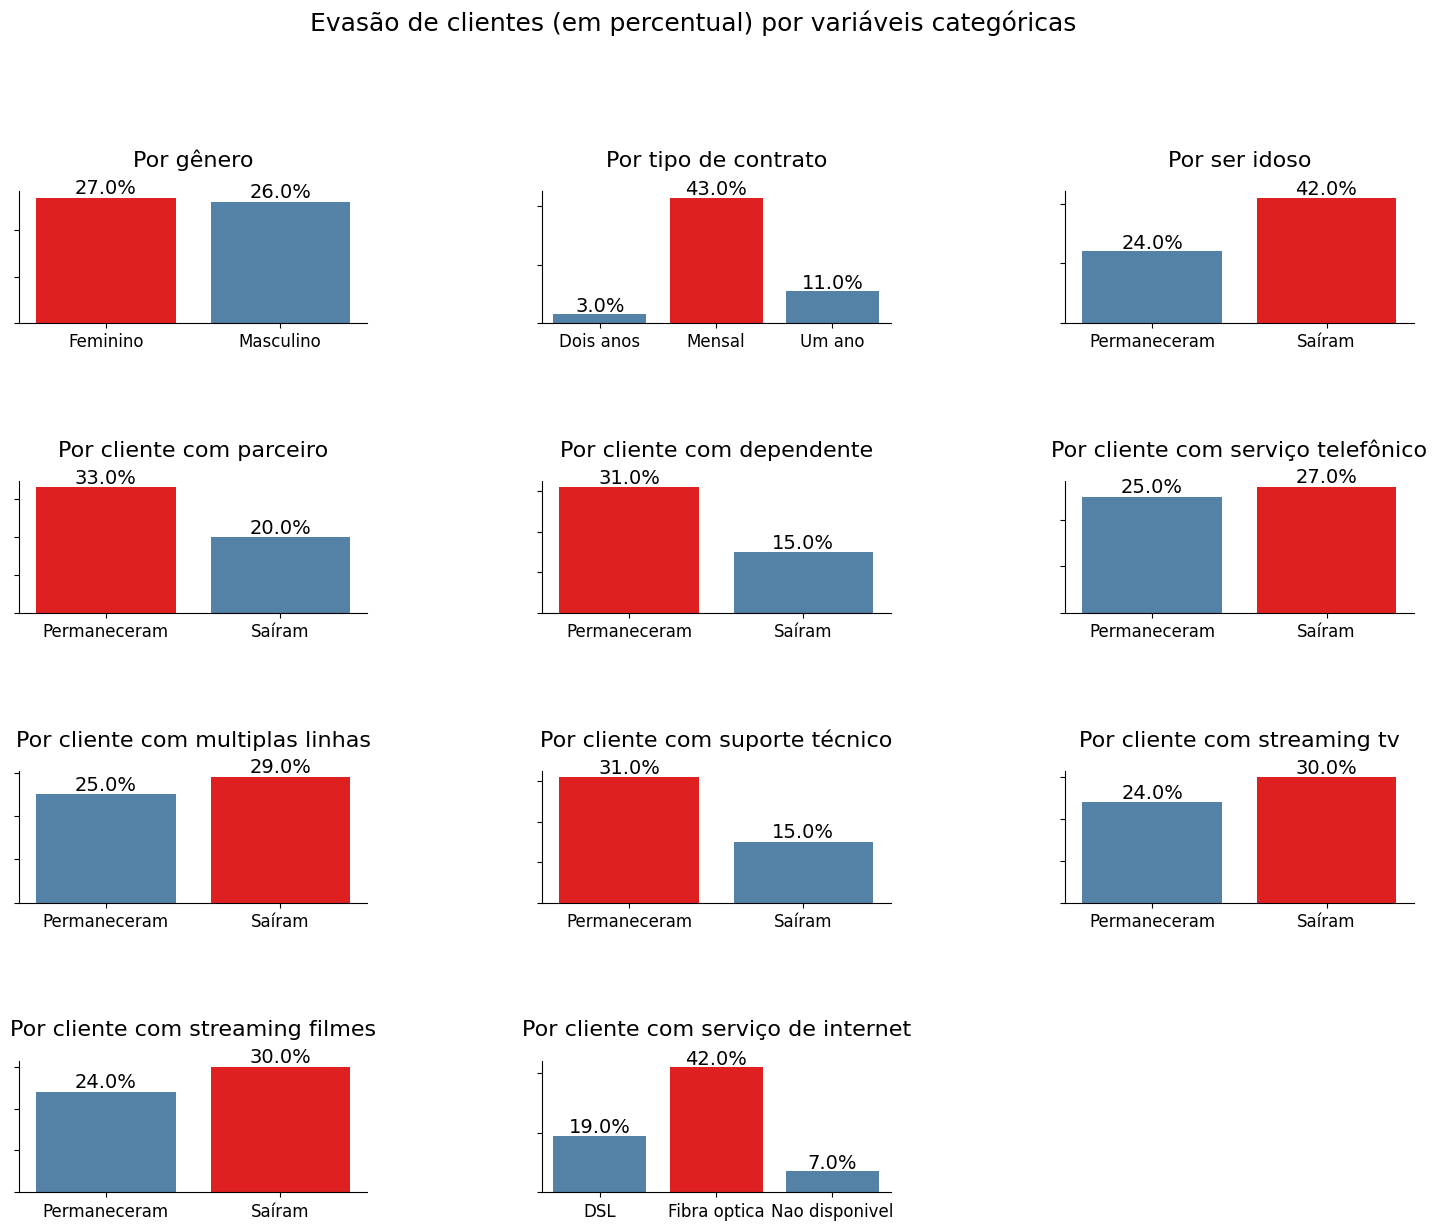

Ao comparar os gráficos das variáveis categóricas notamos alguns pontos críticos como a a maior evasão de cliente com planos mensais.

Por outro lado ao criar gráficos das variáveis numéricas notamos que cliente com menores mensalidades e maiores valores excedentes têm maior taxa de permanencia:

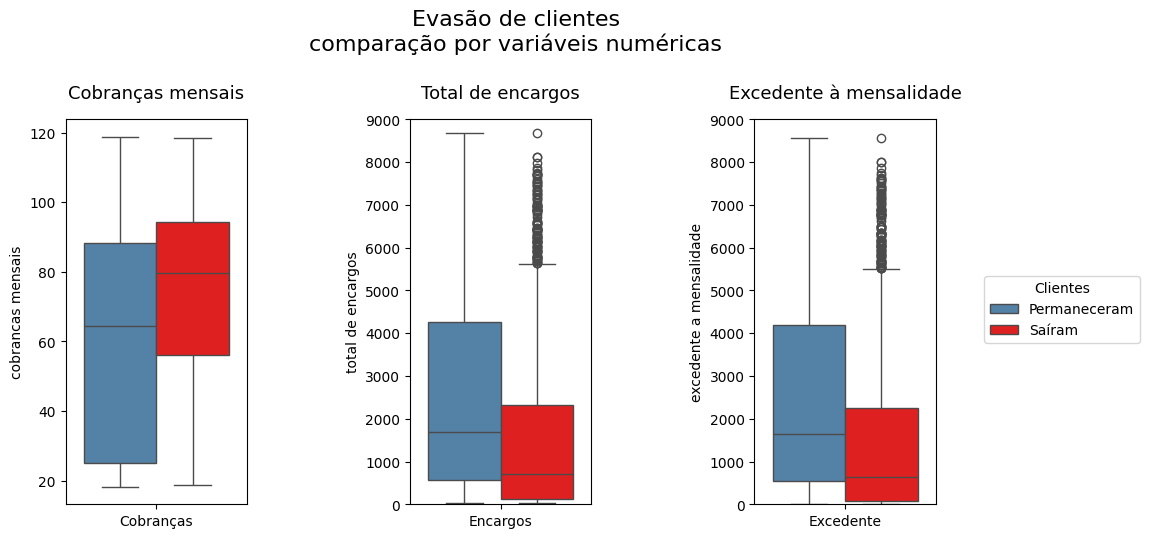

Além desses importantes gráficos para análise restava entender a relação de evasão de clientes com tempo de contato, no gráfico a seguir observa-se que a evasão ocorre majoritariamente nos primeiros meses de contrato, enquanto clientes com maior tempo de permanência apresentam menor propensão ao churn, indicando que ações de retenção devem ser priorizadas no início do relacionamento.

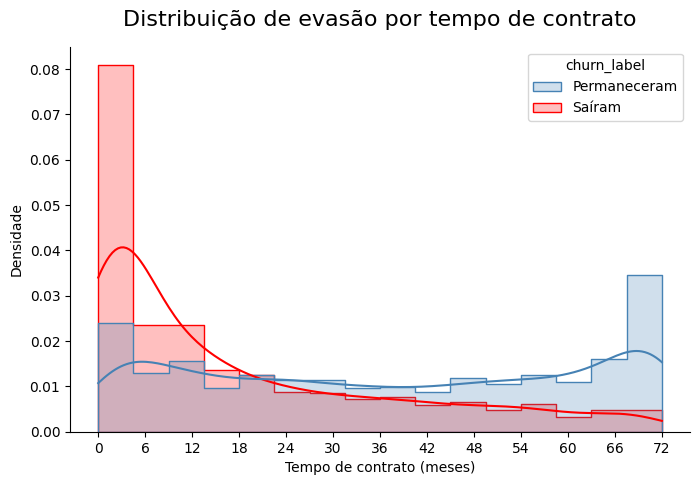


## **Insights**  
Aqui concentra-se todos os 12 insights gerados entre as variáveis categóricas e numéricas analisadas da base de dados, sendo o último insight mais importante.


#### 1º - Gênero
- A evasão é muito parecida entre feminino (27%) e masculino (26%).
 ##### Conclusão: gênero não parece ser um fator decisivo de churn.


--

#### 2º - Cliente idoso
- Idosos saem bem mais (aproximadamente 42%) do que não idosos (aproximadamente 24%).


##### Conclusão: idade é um fator relevante de churn.
--

#### 3º - Cliente com parceiro
* Clientes sem parceiro evadem mais.


##### Conclusão: ter parceiro parece aumentar a retenção.
--

#### 4º - Cliente com dependentes
* Quem não tem dependentes sai mais.


##### Conclusão: clientes com dependentes tendem a ser mais estáveis.
--

#### 5º - Cliente com serviço telefônicos
* Diferença pequena entre quem fica e quem sai.


##### Conclusão: pouco impacto isoladamente.
--

#### 6º - Cliente com múltiplas linhas
* Clientes com múltiplas linhas têm evasão um pouco maior.


##### Conclusão: pode indicar complexidade ou custo maior.
--

#### 7º - Cliente com suporte técnico
* Quem não tem suporte técnico evade muito mais.


##### Conclusão: fator crítico de retenção.
--

#### 8º - Cliente com streaming (TV e filmes)
* Clientes com streaming apresentam evasão maior.


##### Conclusão: pode estar ligado a preço ou insatisfação com o pacote.
--

#### 9º - Cliente por tipo de internet
* Fibra óptica: ~42% de evasão
- DSL: ~19%
- Sem internet: ~7%


##### Conclusão: contraintuitivo, mas indica que clientes de fibra podem ser mais exigentes ou há problemas de preço/qualidade percebida.
--



#### 10º - Cliente por cobranças mensais
* Clientes que saíram têm mediana mais alta de cobrança mensal.

##### Conclusão: quanto maior a mensalidade, maior a chance de evasão.
--

#### 11º - Cliente por total de encargos
* Clientes que permaneceram apresentam: mediana muito mais alta, maior dispersão (clientes antigos).

- Clientes que saíram têm encargos totais baixos.

##### Conclusão importante: churn ocorre principalmente no início do relacionamento.
--

#### 12º - Tipo de contrato
* Mensal: ~43% de evasão (muito alto)

- Um ano: ~11%

- Dois anos: ~3%

##### Conclusão importante: contratos mensais têm altíssimo risco de evasão.
Este é um dos fatores mais importantes do dataset.



## **Conclusão – Análise de Evasão de Clientes da Telecom X**


A análise exploratória dos dados revela que a evasão de clientes na Telecom X não ocorre de forma aleatória, mas está fortemente associada a um conjunto específico de características comportamentais, contratuais e financeiras.





### Os principais fatores relacionados à evasão são:
- Tempo de contrato curto: a maior parte do churn ocorre nos primeiros meses de relacionamento.

- Tipo de contrato mensal: clientes sem fidelização apresentam a maior taxa de evasão.

- Mensalidades elevadas: clientes que pagam mais tendem a sair com maior frequência.

- Clientes idosos: apresentam taxa de evasão significativamente superior à média.

- Ausência de suporte técnico: clientes sem esse serviço demonstram maior insatisfação e saída.

- Perfil familiar: clientes sem parceiro e sem dependentes são mais propensos a cancelar.

- Serviços de valor agregado (streaming, múltiplas linhas): associados a maior churn, possivelmente por percepção de custo-benefício insatisfatória.

- Internet por fibra óptica: apesar de ser um serviço premium, apresenta alta evasão, sugerindo problemas de expectativa, preço ou qualidade percebida.



Por outro lado, clientes com contratos longos, baixo valor mensal, mais tempo de permanência e acúmulo de encargos demonstram forte fidelização.

### Perfil de maior risco de evasão

O cliente mais propenso a evadir apresenta o seguinte perfil:

- Contrato mensal;

- Até 6–12 meses de permanência;

- Mensalidade alta;

- Idoso;

- Sem suporte técnico;

- Sem parceiro ou dependentes;

- Usuário de fibra óptica;

- Consome serviços adicionais sem perceber valor.

## **Recomendações estratégicas para a Telecom X**

### Foco absoluto nos primeiros meses

- Criar um programa de retenção inicial para os primeiros 90 dias.

- Contato ativo com clientes novos (ligações, mensagens, tutoriais).

- Monitoramento automático de clientes com risco precoce.

Impacto esperado: redução significativa do churn inicial.

### Incentivo à migração para contratos longos

- Oferecer descontos progressivos para contratos anuais e bienais.

- Criar bundles exclusivos para clientes fidelizados.

- Comunicação clara do benefício financeiro da fidelização.

Impacto esperado: diminuição do churn estrutural.

### Revisão de preços e pacotes premium

- Avaliar a percepção de valor da fibra óptica.

- Criar versões “lite” de pacotes premium.

- Evitar sobrecarga de serviços adicionais desnecessários.

Impacto esperado: melhor equilíbrio entre preço e valor percebido.

### Fortalecimento do suporte técnico

- Oferecer suporte técnico gratuito nos primeiros meses.

- Priorizar clientes idosos com atendimento humanizado.

- Criar alertas para clientes sem suporte técnico ativo.

Impacto esperado: aumento da satisfação e confiança.

### Estratégias específicas para clientes idosos

- Comunicação simplificada e acessível.

- Atendimento dedicado ou prioritário.

- Programas de fidelidade personalizados.

Impacto esperado: redução do churn em um grupo crítico.

### Uso dos dados para predição e ação

- Desenvolver um modelo preditivo de churn com variáveis-chave:

Tempo de contrato

Tipo de contrato

Valor mensal

Suporte técnico

Idade

- Criar um score de risco para ações preventivas.

Impacto esperado: retenção proativa baseada em dados.

## **Consideração final**

A evasão na Telecom X está concentrada em clientes novos, pouco fidelizados e com alta sensibilidade a preço. Ao direcionar esforços estratégicos para esse público, a empresa pode reduzir churn, aumentar o valor do ciclo de vida do cliente (CLV) e fortalecer sua base de clientes de forma sustentável.

## Anexos

- [Baixar relatório complementar em PDF](https://github.com/DaDosValle/relatorio_implementacao_cloud_aws/blob/relatorio-aws/Relatorio_Implementacao_AWS_Abstergo(ficticio).pdf)


**Assinatura do Responsável pelo Projeto:**  

Fernando do Valle

[Meu Linkedin](https://www.linkedin.com/in/fernando-do-valle/)